## MACS 40123 Proposal Feasibility Assessment
### “Is memory a pattern seeker—or a glitch detector?” — A Study on How Semantic Pairings Shape Object Memorability in Composite Images
----

#### 1. Research Question

⸻

❓ Guiding Questions

Why do some images stick in memory while others vanish? And, if we can compose an image by pairing different elements, which pairing strategy makes the whole picture—and a focal object within it—more memorable? Put differently: what compositional rules govern image memorability?

⸻

📚 Background

Quantities of literature documents viewer-dependent factors (e.g., attention, arousal, expertise) that modulate memory(Angelopoulou & Drigas, 2021; Vaughan & Laborde, 2021; Zsidó, 2024). Yet converging evidence also points to an intrinsic property of images—memorability—the reliable likelihood that an image will be remembered across observers and contexts(Bainbridge, 2019). Notably, memorability is not a simple function of a few features, like attractiveness, novelty(Bainbridge, 2020), and for certain categories (e.g., faces), it appears remarkably stable across changes in viewpoint or emotional status(Bainbridge, 2017). These findings suggest that what is depicted—and how it is composed—plays a central role. Indeed, semantic content is a strong predictor of memorability(Hovhannisyan et al., 2021; Kramer et al., 2023), and compelling work with artworks indicates that artists can deliberately manipulate memorability, whereas naïve observers are relatively poor at predicting it(Davis et al., n.d.). This raises a practical and theoretical question: how can we, naïve observers, compose images—by combining specific elements—to enhance memorability, both for the overall scene and for a target object within it?

⸻

🔗 A key step is to clarify the type of relationships among combined elements.

In language learning, for instance, research is mixed on whether grouping semantically related items facilitates or interferes with acquisition(Oppenheim et al., 2010; Rodd et al., 2012), with evidence for both clustering benefits(Sarwat, 2023) and interference(Chasles et al., 2023). What’s more, in vision, information is encoded both in visual features and semantic relations(Feng & Lapata, 2010), and Ishii(2015) found that the visually relatedness could explain the confusion better. These motivate a direct test in images: do semantically similar pairings (A+B) or semantically dissimilar/surprising pairings (A+C) yield higher memorability—overall and for object A specifically? The expectation is that similarity may promote coherent encoding, but distinctiveness may boost salience—two plausible, competing mechanisms.

⸻

🧩 What’s more, differences between taxonomic/semantic similarity (conceptual proximity in embedding space) and thematic relatedness (co-occurrence or situational linkage) are worth mentioning. 

Nah and Geng(2022) found that people often process thematic groups efficiently (e.g., items that co-occur in daily life), which raises the second question: are images built from semantic “clusters” (high embedding proximity) more memorable than those organized by thematic labels (co-occurrence categories), or vice versa?

⸻

🧠 Finally, recent work suggests that an image’s memorability can be strongly influenced by its most memorable part(Dubey et al., 2015). Yet until recently, systematically and directly testing compositional rules was difficult. 

Generative AI now makes it feasible to control object identity, style, and layout at scale(Feuerriegel et al., 2024). This enables us to ask: when two elements with known memorability are combined, how does the whole image’s memorability emerge—as the maximum, the minimum, the average, or via a non-linear interaction? And how do spatial arrangement and interaction (e.g., top vs. bottom placement, proximity, occlusion) modulate both overall memorability and the memorability of the focal object (A)?

⸻

🎯 Overall, my research questions are as follows:

1. Similarity vs. Dissimilarity
    - When pairing a focal object A with either:
        - a semantically similar object B
        - or a dissimilar object C

    - Which pairing produces:
        - higher overall memorability?
        - higher object-A memorability?

⸻

2. Semantic Clusters vs. Thematic Groups
    - Do images composed from:
        - Semantic clusters (high conceptual proximity)
    - yield higher memorability than
        - Thematic groups (co-occurring or situational)?
    - Or vice versa?

⸻

3. Compositional Rules & Interactions
    - Given two elements with known memorability scores:
        - How does combined memorability arise?
            - max? 
            - min? 
            - mean? 
            - non-linear?
        - How do spatial layout features (e.g., top vs. bottom, proximity, occlusion) affect:
            - overall memorability?
            - object-A memorability?

----

#### 2. Data Structure
- Data source: [THINGS database](https://things-initiative.org/)
    - Hebart MN, Dickter AH, Kidder A, Kwok WY, Corriveau A, et al. (2019) THINGS: A database of 1,854 object concepts and more than 26,000 naturalistic object images. PLOS ONE 14(10): e0223792. https://doi.org/10.1371/journal.pone.0223792
    - [Semantic Embedding Data Available](https://osf.io/jum2f/files)
- Domain of the data
    - 1854 concepts, and each concept is represented by a 300-dimention vector
- Data size
    - 1854*300 = 556,200
    - combination: 1854*1853 = 3,435,462
- Data types
    - words.csv:
        - contains all the concepts(1854*1, string)
    - semantic-embedding_sensevec-augmented-with-wordvec_things.csv
        - contains all the concepts represented by 300-dimention vectors (1854*300, float)
- An example of the dataset

In [1]:
import pandas as pd

vectors_path = "data/semantic_embedding.csv"
word_list_path = "data/word_list.csv"
concept_path = "data/concepts.tsv"

vectors = pd.read_csv(vectors_path, header=None)
word_list = pd.read_csv(word_list_path, header=None)
concept = pd.read_csv(concept_path, sep="\t")

In [2]:
column_category = ["Bottom-up Category (Human Raters)",\
                   "Top-down Category (WordNet)",\
                   "Top-down Category (manual selection)"]
concept_list = concept[column_category]

In [3]:
word_list.columns = ["Word"]
vectors.columns = [f"Dimension_{i}" for i in range(1, len(vectors.columns)+1)]
dataset = pd.concat([word_list, concept_list, vectors], axis=1)
dataset.index = range(1, len(dataset)+1)
dataset.head()

,Word,Bottom-up Category (Human Raters),Top-down Category (WordNet),Top-down Category (manual selection),Dimension_1,Dimension_2,Dimension_3,Dimension_4,Dimension_5,Dimension_6,...,Dimension_291,Dimension_292,Dimension_293,Dimension_294,Dimension_295,Dimension_296,Dimension_297,Dimension_298,Dimension_299,Dimension_300
1,aardvark,animal,animal,animal,0.002518,0.068236,-0.028361,0.166795,-0.065438,0.031492,...,-0.045665,0.011164,-0.005354,0.035327,-0.001382,0.077301,-0.083461,0.064104,-0.004183,0.046304
2,abacus,NaN,NaN,home decor,0.056792,-0.063938,-0.001322,0.045321,-0.038369,0.048631,...,-0.002180,0.041572,-0.017164,-0.052926,-0.051482,-0.040223,-0.066239,0.016329,-0.076589,-0.009422
3,accordion,musical instrument,musical instrument,musical instrument,0.027205,0.002443,-0.025440,0.022057,-0.027733,0.004925,...,0.018821,0.074330,-0.086789,-0.115503,0.019062,0.069380,0.001089,-0.006804,0.006405,0.036277
4,acorn,NaN,fruit,NaN,0.034074,0.006323,-0.079977,0.064698,-0.002513,-0.019950,...,0.012923,0.023666,-0.046211,-0.060001,0.047634,-0.036336,0.012826,-0.053503,-0.013425,0.059680
5,air conditioner,NaN,NaN,electronic device,0.001522,0.003388,-0.031035,-0.008351,-0.013928,0.066164,...,-0.048569,0.047054,-0.002966,0.038435,0.027077,-0.031518,-0.092717,0.145555,0.015335,0.023629


In [4]:
dataset

,Word,Bottom-up Category (Human Raters),Top-down Category (WordNet),Top-down Category (manual selection),Dimension_1,Dimension_2,Dimension_3,Dimension_4,Dimension_5,Dimension_6,...,Dimension_291,Dimension_292,Dimension_293,Dimension_294,Dimension_295,Dimension_296,Dimension_297,Dimension_298,Dimension_299,Dimension_300
1,aardvark,animal,animal,animal,0.002518,0.068236,-0.028361,0.166795,-0.065438,0.031492,...,-0.045665,0.011164,-0.005354,0.035327,-0.001382,0.077301,-0.083461,0.064104,-0.004183,0.046304
2,abacus,NaN,NaN,home decor,0.056792,-0.063938,-0.001322,0.045321,-0.038369,0.048631,...,-0.002180,0.041572,-0.017164,-0.052926,-0.051482,-0.040223,-0.066239,0.016329,-0.076589,-0.009422
3,accordion,musical instrument,musical instrument,musical instrument,0.027205,0.002443,-0.025440,0.022057,-0.027733,0.004925,...,0.018821,0.074330,-0.086789,-0.115503,0.019062,0.069380,0.001089,-0.006804,0.006405,0.036277
4,acorn,NaN,fruit,NaN,0.034074,0.006323,-0.079977,0.064698,-0.002513,-0.019950,...,0.012923,0.023666,-0.046211,-0.060001,0.047634,-0.036336,0.012826,-0.053503,-0.013425,0.059680
5,air conditioner,NaN,NaN,electronic device,0.001522,0.003388,-0.031035,-0.008351,-0.013928,0.066164,...,-0.048569,0.047054,-0.002966,0.038435,0.027077,-0.031518,-0.092717,0.145555,0.015335,0.023629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,yoke,NaN,NaN,NaN,-0.007247,-0.009497,-0.098389,0.014883,-0.074022,-0.034846,...,-0.082572,0.112528,-0.085710,-0.013974,-0.015309,-0.062135,-0.036656,-0.000741,0.035923,0.008339
1851,yolk,NaN,food,food,-0.046959,0.029584,0.026730,-0.007823,-0.048818,-0.022490,...,-0.073924,0.004924,-0.097171,-0.011267,0.022133,-0.018902,0.015964,-0.019782,0.044278,0.005173
1852,zebra,animal,animal,animal,-0.012443,-0.002405,-0.115256,0.053251,-0.037307,-0.033384,...,-0.055284,0.061006,-0.054515,0.034001,0.131828,0.113010,0.030256,0.042306,0.012012,0.003221
1853,zipper,NaN,NaN,NaN,-0.002309,0.003196,-0.023785,0.035685,-0.052391,-0.026013,...,-0.012735,0.004240,-0.056979,0.045449,0.008078,-0.051059,0.035830,-0.024869,-0.006122,0.064542


## dictionary

In [5]:
# --- config ---
CATEGORY_COLS = [
    "Bottom-up Category (Human Raters)",
    "Top-down Category (WordNet)",
    "Top-down Category (manual selection)",
]

def split_to_list(val):
    """Split a cell into a clean list by commas; handle NaN and dedupe while preserving order."""
    if pd.isna(val):
        return []
    # Convert to string (in case of non-string), split on comma, strip, drop empties
    parts = [p.strip() for p in str(val).split(",")]
    parts = [p for p in parts if p]
    # Deduplicate preserving order
    seen = set()
    out = []
    for p in parts:
        if p not in seen:
            seen.add(p)
            out.append(p)
    return out

def df_to_nested_dict(df: pd.DataFrame,
                      category_cols=CATEGORY_COLS,
                      drop_empty_categories=False):
    result = {}
    for _, row in df.iterrows():
        word = row["Word"]
        inner = {col: split_to_list(row.get(col)) for col in category_cols}

        if drop_empty_categories:
            inner = {k: v for k, v in inner.items() if v}  # remove keys with []

        result[word] = inner
    return result

In [6]:
nested = df_to_nested_dict(dataset, drop_empty_categories=False)
nested

{'aardvark': {'Bottom-up Category (Human Raters)': ['animal'],
  'Top-down Category (WordNet)': ['animal'],
  'Top-down Category (manual selection)': ['animal']},
 'abacus': {'Bottom-up Category (Human Raters)': [],
  'Top-down Category (WordNet)': [],
  'Top-down Category (manual selection)': ['home decor']},
 'accordion': {'Bottom-up Category (Human Raters)': ['musical instrument'],
  'Top-down Category (WordNet)': ['musical instrument'],
  'Top-down Category (manual selection)': ['musical instrument']},
 'acorn': {'Bottom-up Category (Human Raters)': [],
  'Top-down Category (WordNet)': ['fruit'],
  'Top-down Category (manual selection)': []},
 'air conditioner': {'Bottom-up Category (Human Raters)': [],
  'Top-down Category (WordNet)': [],
  'Top-down Category (manual selection)': ['electronic device']},
 'air mattress': {'Bottom-up Category (Human Raters)': [],
  'Top-down Category (WordNet)': [],
  'Top-down Category (manual selection)': ['furniture']},
 'air pump': {'Bottom-up C

In [7]:

def build_per_column_maps_from_nested(nested,
                                      category_cols=CATEGORY_COLS,
                                      order="appearance"):  # "appearance" or "alpha"
    """
    Input:
      nested: {
        <word>: {
          "Bottom-up Category (Human Raters)": [..],
          "Top-down Category (WordNet)": [..],
          "Top-down Category (manual selection)": [..],
          ... (e.g., "embedding")
        }, ...
      }

    Returns:
      per_col: {<column>: {<category>: [word1, word2, ...]}}
    """
    per_col = {col: {} for col in category_cols}
    # track seen (category, word) to dedupe while preserving order
    seen_pairs = {col: set() for col in category_cols}

    def add_word(dest_map, cat, word, seen):
        if (cat, word) in seen:
            return
        seen.add((cat, word))
        dest_map.setdefault(cat, []).append(word)

    for word, inner in nested.items():
        if not isinstance(inner, dict):
            continue
        for col in category_cols:
            cats = inner.get(col, [])
            if cats is None:
                continue
            # ensure list
            if isinstance(cats, (str, int, float)):
                cats = [str(cats)]
            for cat in cats:
                cat = str(cat).strip()
                if not cat or cat.lower() in {"nan", "none"}:
                    continue
                add_word(per_col[col], cat, word, seen_pairs[col])

    if order == "alpha":
        for col in category_cols:
            for cat in per_col[col]:
                per_col[col][cat] = sorted(per_col[col][cat], key=str.lower)

    return per_col

In [8]:
per_col = build_per_column_maps_from_nested(nested)

In [54]:
pd.Series(per_col["Top-down Category (manual selection)"]["weapon"]).to_csv("weapon.txt", index=False, header=False)

In [9]:
for k,v in per_col.items():
    print(f"---- {k} ----")
    i = 0
    for category, words in v.items():
        i += 1
        print(f"({i}) {category}")
        print(words)
        print( )

---- Bottom-up Category (Human Raters) ----
(1) animal
['aardvark', 'alligator', 'alpaca', 'anteater', 'antelope', 'badger', 'bear', 'beaver', 'bird', 'bison', 'boar', 'bull', 'camel', 'cat', 'cheetah', 'chick', 'chinchilla', 'chipmunk', 'cougar', 'cow', 'coyote', 'deer', 'dog', 'donkey', 'duck', 'elephant', 'ferret', 'fox', 'gazelle', 'giraffe', 'goat', 'gopher', 'gorilla', 'groundhog', 'guinea pig', 'hamster', 'hedgehog', 'hippopotamus', 'horse', 'hyena', 'jellyfish', 'kangaroo', 'kitten', 'koala', 'lamb', 'leech', 'leopard', 'lion', 'llama', 'meerkat', 'mole', 'mongoose', 'monkey', 'moose', 'orangutan', 'ostrich', 'otter', 'panda', 'panther', 'penguin', 'pig', 'piglet', 'platypus', 'polar bear', 'pony', 'porcupine', 'possum', 'puppy', 'rabbit', 'raccoon', 'racehorse', 'ram', 'reindeer', 'rhinoceros', 'scorpion', 'seal', 'shark', 'sheep', 'skunk', 'sloth', 'slug', 'snail', 'squirrel', 'tiger', 'turtle', 'walrus', 'warthog', 'weasel', 'wolf', 'yak', 'zebra']

(2) musical instrument
['

----
#### 3. Feasibility Assessment
1. Find similar pairs


2. Using ComfyUI to generate combination of these conceptual pairs
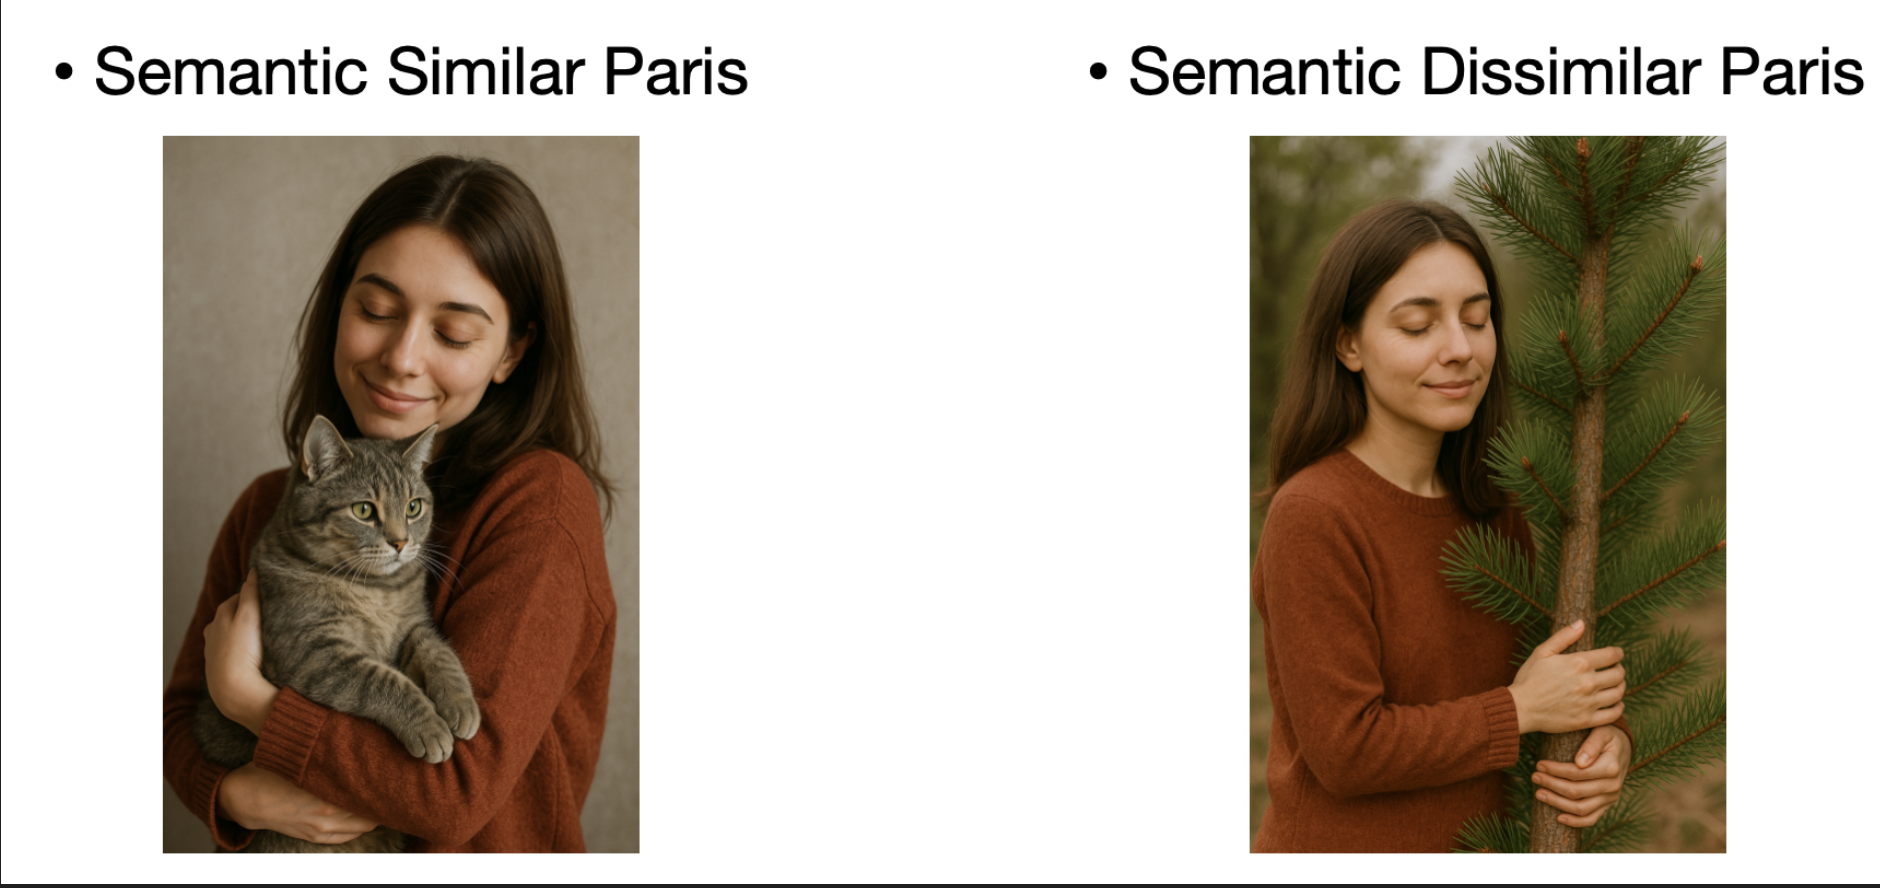
3. Using ResMem to get the memorability scores for each picture

4. Compare the memorability scores for each group (similar pairs vs. dissimiliar pairs)

----
### Bibliography
- Angelopoulou, E., & Drigas, A. (2021). Working memory, attention and their relationship: A theoretical overview. Research, Society and Development, 10(5), e46410515288–e46410515288. https://doi.org/10.33448/rsd-v10i5.15288

- Bainbridge, W. A. (2017). The memorability of people: Intrinsic memorability across transformations of a person’s face. Journal of Experimental Psychology: Learning, Memory, and Cognition, 43(5), 706–716. https://doi.org/10.1037/xlm0000339

- Bainbridge, W. A. (2019). Memorability: How what we see influences what we remember. In Psychology of Learning and Motivation (Vol. 70, pp. 1–27). Elsevier. https://doi.org/10.1016/bs.plm.2019.02.001

- Bainbridge, W. A. (2020). The resiliency of image memorability: A predictor of memory separate from attention and priming. Neuropsychologia, 141, 107408. https://doi.org/10.1016/j.neuropsychologia.2020.107408

- Chasles, M.-J., Joubert, S., Cole, J., Delage, E., & Et Rouleau, I. (2023). Learning and vulnerability to phonological and semantic interference in normal aging: An experimental study. Memory, 31(2), 297–314. https://doi.org/10.1080/09658211.2022.2154366

- Davis, T. M., Chen, Y. E., & Bainbridge, W. A. (n.d.). Artists Can Design Memory, and AI Can Predict It.

- Dubey, R., Peterson, J., Khosla, A., Yang, M.-H., & Ghanem, B. (2015). What Makes an Object Memorable? 2015 IEEE International Conference on Computer Vision (ICCV), 1089–1097. https://doi.org/10.1109/ICCV.2015.130

- Feng, Y., & Lapata, M. (2010). Visual Information in Semantic Representation. Association for Computational Linguistics, 91–99. https://aclanthology.org/N10-1011/

- Feuerriegel, S., Hartmann, J., Janiesch, C., & Zschech, P. (2024). Generative AI. Business & Information Systems Engineering, 66(1), 111–126. https://doi.org/10.1007/s12599-023-00834-7

- Hovhannisyan, M., Clarke, A., Geib, B. R., Cicchinelli, R., Monge, Z., Worth, T., Szymanski, A., Cabeza, R., & Davis, S. W. (2021). The visual and semantic features that predict object memory: Concept property norms for 1,000 object images. Memory & Cognition, 49(4), 712–731. https://doi.org/10.3758/s13421-020-01130-5

- Ishii, T. (2015). Semantic connection or visual connection: Investigating the true source of confusion. Language Teaching Research, 19(6), 712–722. https://doi.org/10.1177/1362168814559799

- Kramer, M. A., Hebart, M. N., Baker, C. I., & Bainbridge, W. A. (2023). The features underlying the memorability of objects. Science Advances, 9(7), eadd2981. https://doi.org/10.1126/sciadv.add2981

- Nah, J. C., & Geng, J. J. (2022). Thematic Object Pairs Produce Stronger and Faster Grouping Than Taxonomic Pairs. Journal of Experimental Psychology. Human Perception and Performance, 48(12), 1325–1335. https://doi.org/10.1037/xhp0001031

- Oppenheim, G. M., Dell, G. S., & Schwartz, M. F. (2010). The dark side of incremental learning: A model of cumulative semantic interference during lexical access in speech production. Cognition, 114(2), 227–252. https://doi.org/10.1016/j.cognition.2009.09.007

- Rodd, J. M., Berriman, R., Landau, M., Lee, T., Ho, C., Gaskell, M. G., & Davis, M. H. (2012). Learning new meanings for old words: Effects of semantic relatedness. Memory & Cognition, 40(7), 1095–1108. https://doi.org/10.3758/s13421-012-0209-1

- Sarwat, S. (2023). Use Of Semantic and Clustering Methods: For Teaching English Vocabulary At Elementary Level. International “Journal of Academic Research for Humanities,” 3(4), 74–84. https://jar.bwo-researches.com/index.php/jarh/article/view/302

- Vaughan, R. S., & Laborde, S. (2021). Attention, working-memory control, working-memory capacity, and sport performance: The moderating role of athletic expertise. European Journal of Sport Science, 21(2), 240–249. https://doi.org/10.1080/17461391.2020.1739143

- Zsidó, A. N. (2024). The effect of emotional arousal on visual attentional performance: A systematic review. Psychological Research, 88(1), 1–24. https://doi.org/10.1007/s00426-023-01852-6

In [17]:
dataset_PCA

,Dimension_1,Dimension_2,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,Dimension_10,...,Dimension_291,Dimension_292,Dimension_293,Dimension_294,Dimension_295,Dimension_296,Dimension_297,Dimension_298,Dimension_299,Dimension_300
1,0.002518,0.068236,-0.028361,0.166795,-0.065438,0.031492,0.072952,0.005569,0.006577,-0.011896,...,-0.045665,0.011164,-0.005354,0.035327,-0.001382,0.077301,-0.083461,0.064104,-0.004183,0.046304
2,0.056792,-0.063938,-0.001322,0.045321,-0.038369,0.048631,0.050771,-0.090274,-0.016943,0.067346,...,-0.002180,0.041572,-0.017164,-0.052926,-0.051482,-0.040223,-0.066239,0.016329,-0.076589,-0.009422
3,0.027205,0.002443,-0.025440,0.022057,-0.027733,0.004925,0.069669,-0.036609,0.043710,-0.023415,...,0.018821,0.074330,-0.086789,-0.115503,0.019062,0.069380,0.001089,-0.006804,0.006405,0.036277
4,0.034074,0.006323,-0.079977,0.064698,-0.002513,-0.019950,0.094188,-0.002276,-0.002716,0.128304,...,0.012923,0.023666,-0.046211,-0.060001,0.047634,-0.036336,0.012826,-0.053503,-0.013425,0.059680
5,0.001522,0.003388,-0.031035,-0.008351,-0.013928,0.066164,0.036939,-0.052600,0.041855,0.092639,...,-0.048569,0.047054,-0.002966,0.038435,0.027077,-0.031518,-0.092717,0.145555,0.015335,0.023629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,-0.007247,-0.009497,-0.098389,0.014883,-0.074022,-0.034846,0.031211,-0.075538,0.023160,0.065245,...,-0.082572,0.112528,-0.085710,-0.013974,-0.015309,-0.062135,-0.036656,-0.000741,0.035923,0.008339
1851,-0.046959,0.029584,0.026730,-0.007823,-0.048818,-0.022490,0.042724,-0.058452,-0.051158,0.060507,...,-0.073924,0.004924,-0.097171,-0.011267,0.022133,-0.018902,0.015964,-0.019782,0.044278,0.005173
1852,-0.012443,-0.002405,-0.115256,0.053251,-0.037307,-0.033384,0.041371,-0.027366,-0.069512,-0.011347,...,-0.055284,0.061006,-0.054515,0.034001,0.131828,0.113010,0.030256,0.042306,0.012012,0.003221
1853,-0.002309,0.003196,-0.023785,0.035685,-0.052391,-0.026013,-0.007483,0.030385,0.060418,-0.001094,...,-0.012735,0.004240,-0.056979,0.045449,0.008078,-0.051059,0.035830,-0.024869,-0.006122,0.064542


In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# X = dataset_PCA.values

# # PCA to 2D (or whatever)
# pca = PCA(n_components=2, random_state=42)
# X_pca = pca.fit_transform(X)

# # K-means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(X_pca)

# dataset_PCA["pca_1"] = X_pca[:, 0]
# dataset_PCA["pca_2"] = X_pca[:, 1]

kmeans = KMeans(n_clusters=27, random_state=42)
clusters = kmeans.fit_predict(dataset_PCA)

dataset_PCA["cluster"] = clusters

In [41]:
dataset_PCA

,Dimension_1,Dimension_2,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,Dimension_10,...,Dimension_292,Dimension_293,Dimension_294,Dimension_295,Dimension_296,Dimension_297,Dimension_298,Dimension_299,Dimension_300,cluster
1,0.002518,0.068236,-0.028361,0.166795,-0.065438,0.031492,0.072952,0.005569,0.006577,-0.011896,...,0.011164,-0.005354,0.035327,-0.001382,0.077301,-0.083461,0.064104,-0.004183,0.046304,11
2,0.056792,-0.063938,-0.001322,0.045321,-0.038369,0.048631,0.050771,-0.090274,-0.016943,0.067346,...,0.041572,-0.017164,-0.052926,-0.051482,-0.040223,-0.066239,0.016329,-0.076589,-0.009422,17
3,0.027205,0.002443,-0.025440,0.022057,-0.027733,0.004925,0.069669,-0.036609,0.043710,-0.023415,...,0.074330,-0.086789,-0.115503,0.019062,0.069380,0.001089,-0.006804,0.006405,0.036277,22
4,0.034074,0.006323,-0.079977,0.064698,-0.002513,-0.019950,0.094188,-0.002276,-0.002716,0.128304,...,0.023666,-0.046211,-0.060001,0.047634,-0.036336,0.012826,-0.053503,-0.013425,0.059680,8
5,0.001522,0.003388,-0.031035,-0.008351,-0.013928,0.066164,0.036939,-0.052600,0.041855,0.092639,...,0.047054,-0.002966,0.038435,0.027077,-0.031518,-0.092717,0.145555,0.015335,0.023629,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,-0.007247,-0.009497,-0.098389,0.014883,-0.074022,-0.034846,0.031211,-0.075538,0.023160,0.065245,...,0.112528,-0.085710,-0.013974,-0.015309,-0.062135,-0.036656,-0.000741,0.035923,0.008339,12
1851,-0.046959,0.029584,0.026730,-0.007823,-0.048818,-0.022490,0.042724,-0.058452,-0.051158,0.060507,...,0.004924,-0.097171,-0.011267,0.022133,-0.018902,0.015964,-0.019782,0.044278,0.005173,9
1852,-0.012443,-0.002405,-0.115256,0.053251,-0.037307,-0.033384,0.041371,-0.027366,-0.069512,-0.011347,...,0.061006,-0.054515,0.034001,0.131828,0.113010,0.030256,0.042306,0.012012,0.003221,23
1853,-0.002309,0.003196,-0.023785,0.035685,-0.052391,-0.026013,-0.007483,0.030385,0.060418,-0.001094,...,0.004240,-0.056979,0.045449,0.008078,-0.051059,0.035830,-0.024869,-0.006122,0.064542,3


In [42]:
dataset_PCA["cluster"].value_counts()

cluster
4     146
12    137
1     123
11    109
25     91
17     85
9      77
21     77
3      75
2      73
24     69
8      69
0      66
7      65
6      63
19     57
14     56
18     55
5      54
22     51
20     49
16     45
15     40
23     37
26     34
10     34
13      7
Name: count, dtype: int64

In [43]:
category = dataset_PCA["cluster"].unique()

dataset["cluster"] = None
for i in category:
    dataset.loc[dataset_PCA[dataset_PCA["cluster"]==i].index, "cluster"] = i

In [44]:
dataset

,Word,Bottom-up Category (Human Raters),Top-down Category (WordNet),Top-down Category (manual selection),Dimension_1,Dimension_2,Dimension_3,Dimension_4,Dimension_5,Dimension_6,...,Dimension_292,Dimension_293,Dimension_294,Dimension_295,Dimension_296,Dimension_297,Dimension_298,Dimension_299,Dimension_300,cluster
1,aardvark,animal,animal,animal,0.002518,0.068236,-0.028361,0.166795,-0.065438,0.031492,...,0.011164,-0.005354,0.035327,-0.001382,0.077301,-0.083461,0.064104,-0.004183,0.046304,11
2,abacus,NaN,NaN,home decor,0.056792,-0.063938,-0.001322,0.045321,-0.038369,0.048631,...,0.041572,-0.017164,-0.052926,-0.051482,-0.040223,-0.066239,0.016329,-0.076589,-0.009422,17
3,accordion,musical instrument,musical instrument,musical instrument,0.027205,0.002443,-0.025440,0.022057,-0.027733,0.004925,...,0.074330,-0.086789,-0.115503,0.019062,0.069380,0.001089,-0.006804,0.006405,0.036277,22
4,acorn,NaN,fruit,NaN,0.034074,0.006323,-0.079977,0.064698,-0.002513,-0.019950,...,0.023666,-0.046211,-0.060001,0.047634,-0.036336,0.012826,-0.053503,-0.013425,0.059680,8
5,air conditioner,NaN,NaN,electronic device,0.001522,0.003388,-0.031035,-0.008351,-0.013928,0.066164,...,0.047054,-0.002966,0.038435,0.027077,-0.031518,-0.092717,0.145555,0.015335,0.023629,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,yoke,NaN,NaN,NaN,-0.007247,-0.009497,-0.098389,0.014883,-0.074022,-0.034846,...,0.112528,-0.085710,-0.013974,-0.015309,-0.062135,-0.036656,-0.000741,0.035923,0.008339,12
1851,yolk,NaN,food,food,-0.046959,0.029584,0.026730,-0.007823,-0.048818,-0.022490,...,0.004924,-0.097171,-0.011267,0.022133,-0.018902,0.015964,-0.019782,0.044278,0.005173,9
1852,zebra,animal,animal,animal,-0.012443,-0.002405,-0.115256,0.053251,-0.037307,-0.033384,...,0.061006,-0.054515,0.034001,0.131828,0.113010,0.030256,0.042306,0.012012,0.003221,23
1853,zipper,NaN,NaN,NaN,-0.002309,0.003196,-0.023785,0.035685,-0.052391,-0.026013,...,0.004240,-0.056979,0.045449,0.008078,-0.051059,0.035830,-0.024869,-0.006122,0.064542,3


In [45]:
# dataset = dataset.drop(["clutser"], axis=1)

In [46]:
dataset_cluster = dataset.iloc[:,[0,1,2,3,len(dataset.columns)-1]]

In [47]:
dataset_cluster = dataset_cluster.sort_values(by="cluster")

In [48]:
dataset_cluster.to_csv("cluster.csv",index=0)

In [49]:
dataset_cluster[dataset_cluster["cluster"]==23]["Word"]

1171           pig
1085       ostrich
816          hyena
1266        rabbit
876         kitten
327      chihuahua
1415         sheep
215           bull
322          chick
1734        turkey
1174        piglet
579         ferret
1222        poodle
1259         puppy
405           coop
939          llama
1250           pug
1852         zebra
723     guinea pig
1158      pet food
1283           ram
243           calf
1331       rooster
242           calf
472      dalmatian
1846           yak
246          camel
135          bison
496            dog
890           lamb
427            cow
505         donkey
497        dogfood
16          alpaca
1719        trough
152           boar
685           goat
Name: Word, dtype: object

In [ ]:
dataset_cluster[dataset_cluster["cluster"]==15]["Word"].to_csv("cluster_weapon.txt", index=False, header=False)